In [1]:
#Lets import necessory libraries
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

So, Here we have 32560 rows and 15 columns

In [4]:
#Lets check for null values.
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We dont have null we are good to proceed...

In [5]:
#Lets check for data type of the dataset
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
# Before any analysis, let's convert the target column into numerical classes.

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2 = lab_enc.fit_transform(data['Income'])
pd.Series(df2)
data['Income']=df2
data


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


0 is <=50K

1 IS >50k

In [7]:
#Lets check for question mark
data.Native_country.replace(' ?', np.nan, inplace = True)
data.Workclass.replace(' ?', np.nan, inplace = True)
data.Occupation.replace(' ?', np.nan, inplace = True)


In [8]:
#Lets check for null values
data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
data['Workclass']=data['Workclass'].fillna(data['Workclass'].mode()[0])
data['Occupation']=data['Occupation'].fillna(data['Occupation'].mode()[0])
data['Native_country']=data['Native_country'].fillna(data['Native_country'].mode()[0])

In [10]:
#Lets check again
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# EDA -> Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

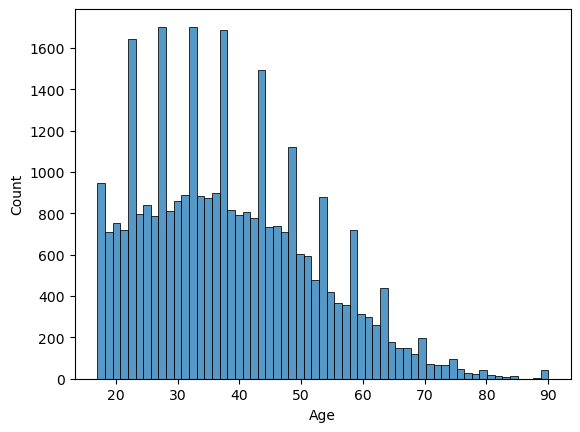

In [12]:
sns.histplot(data['Age'])
plt.show()

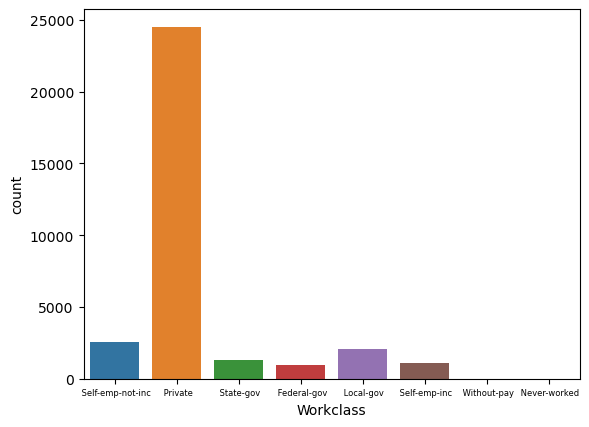

In [13]:
sns.countplot(x='Workclass',data=data,)
plt.xticks(size=6)
plt.show()

So ,Here we can observe that most of the people are working private job.

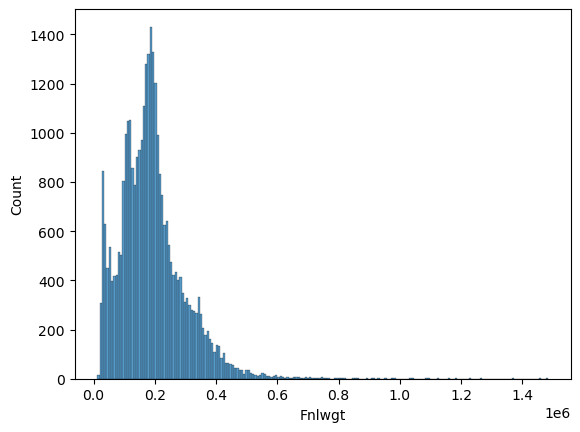

In [14]:
sns.histplot((data["Fnlwgt"]))
plt.show()

Here we can observe that our Fnlwgt is right Skewed.

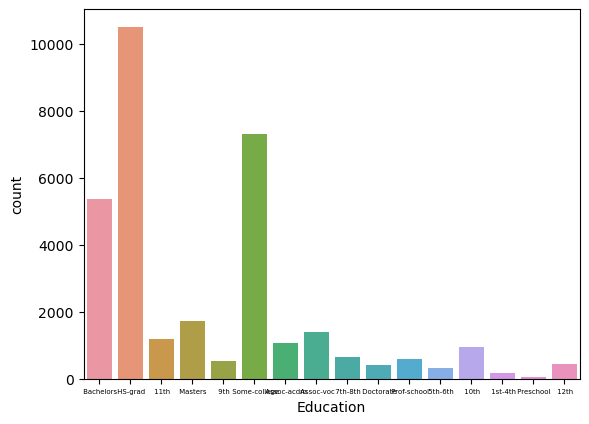

In [15]:
sns.countplot(x='Education',data=data)
plt.xticks(size=5)
plt.show()

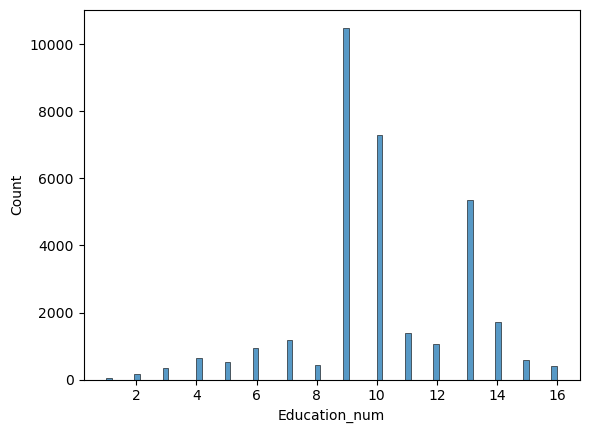

In [16]:
sns.histplot(x='Education_num',data=data)
plt.show()

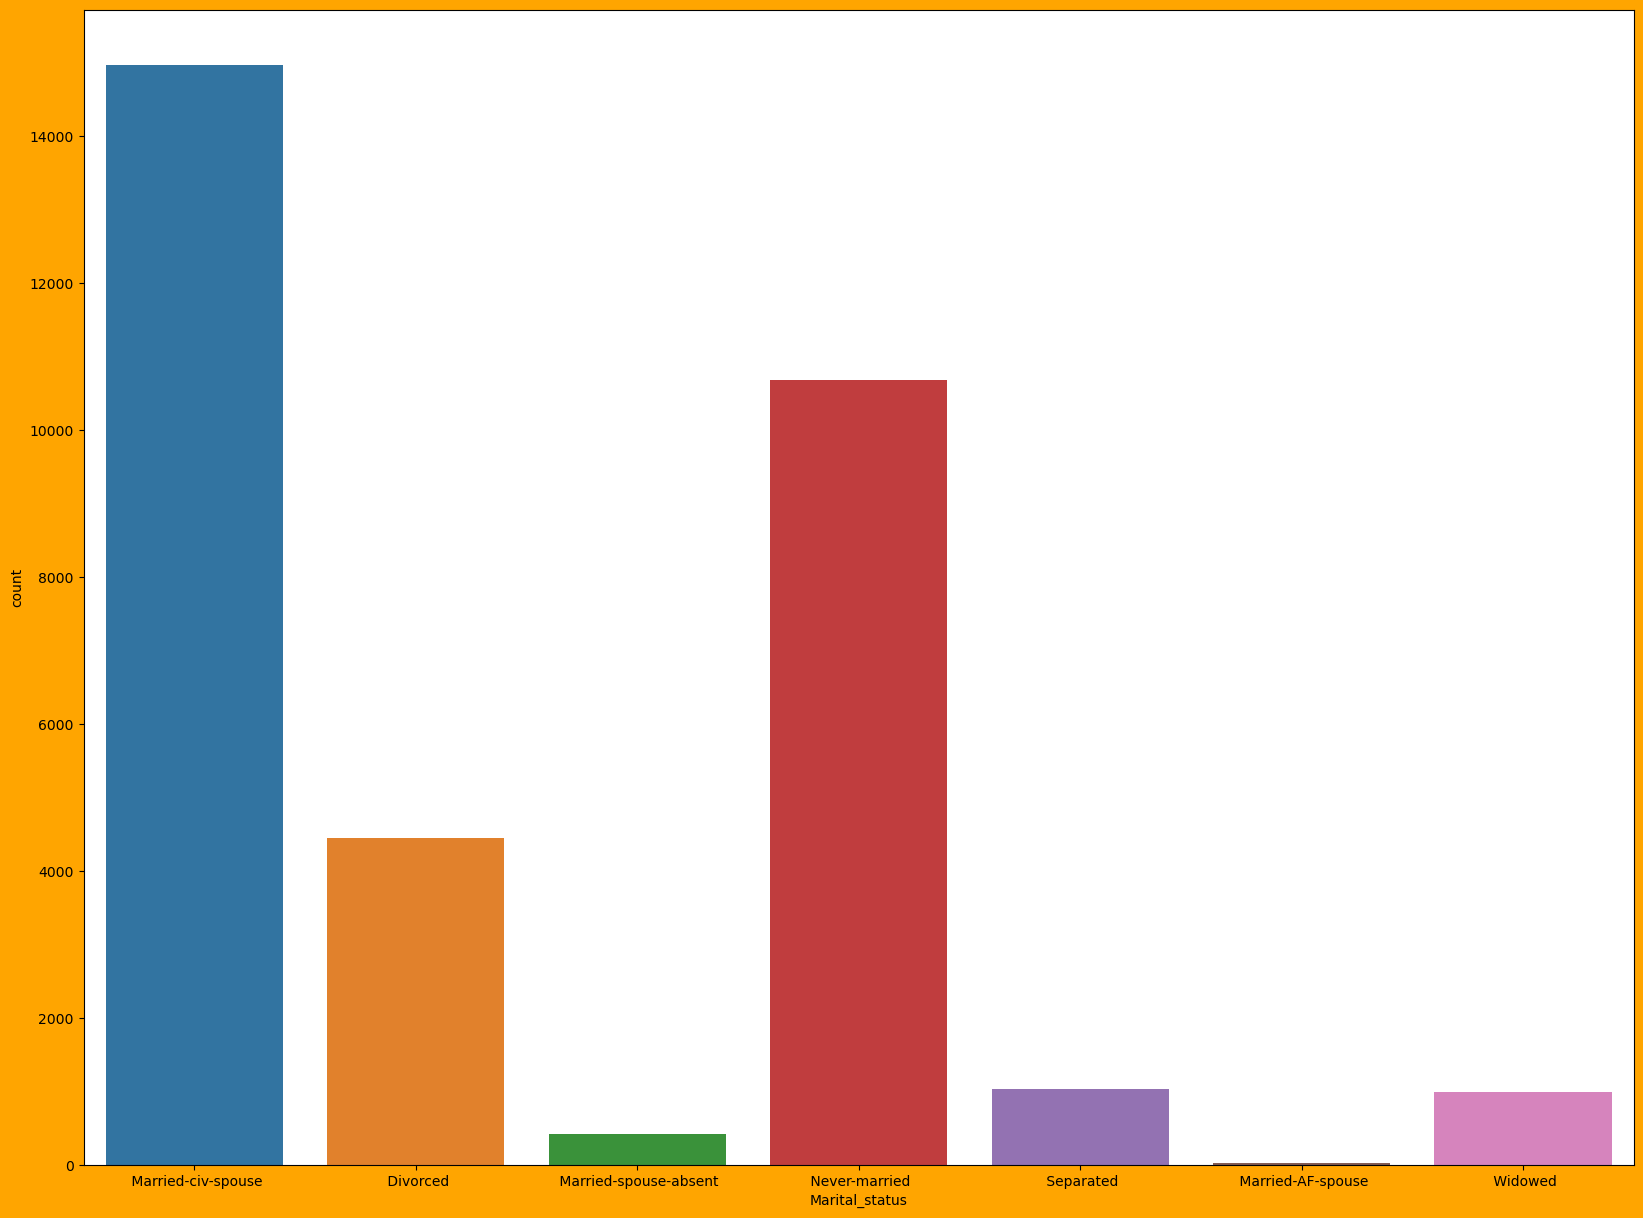

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [17]:
#Lets plot Martial Status
plt.figure(figsize=(20,15),facecolor='orange')
sns.countplot(x='Marital_status',data=data)
plt.show()
data.Marital_status.value_counts()

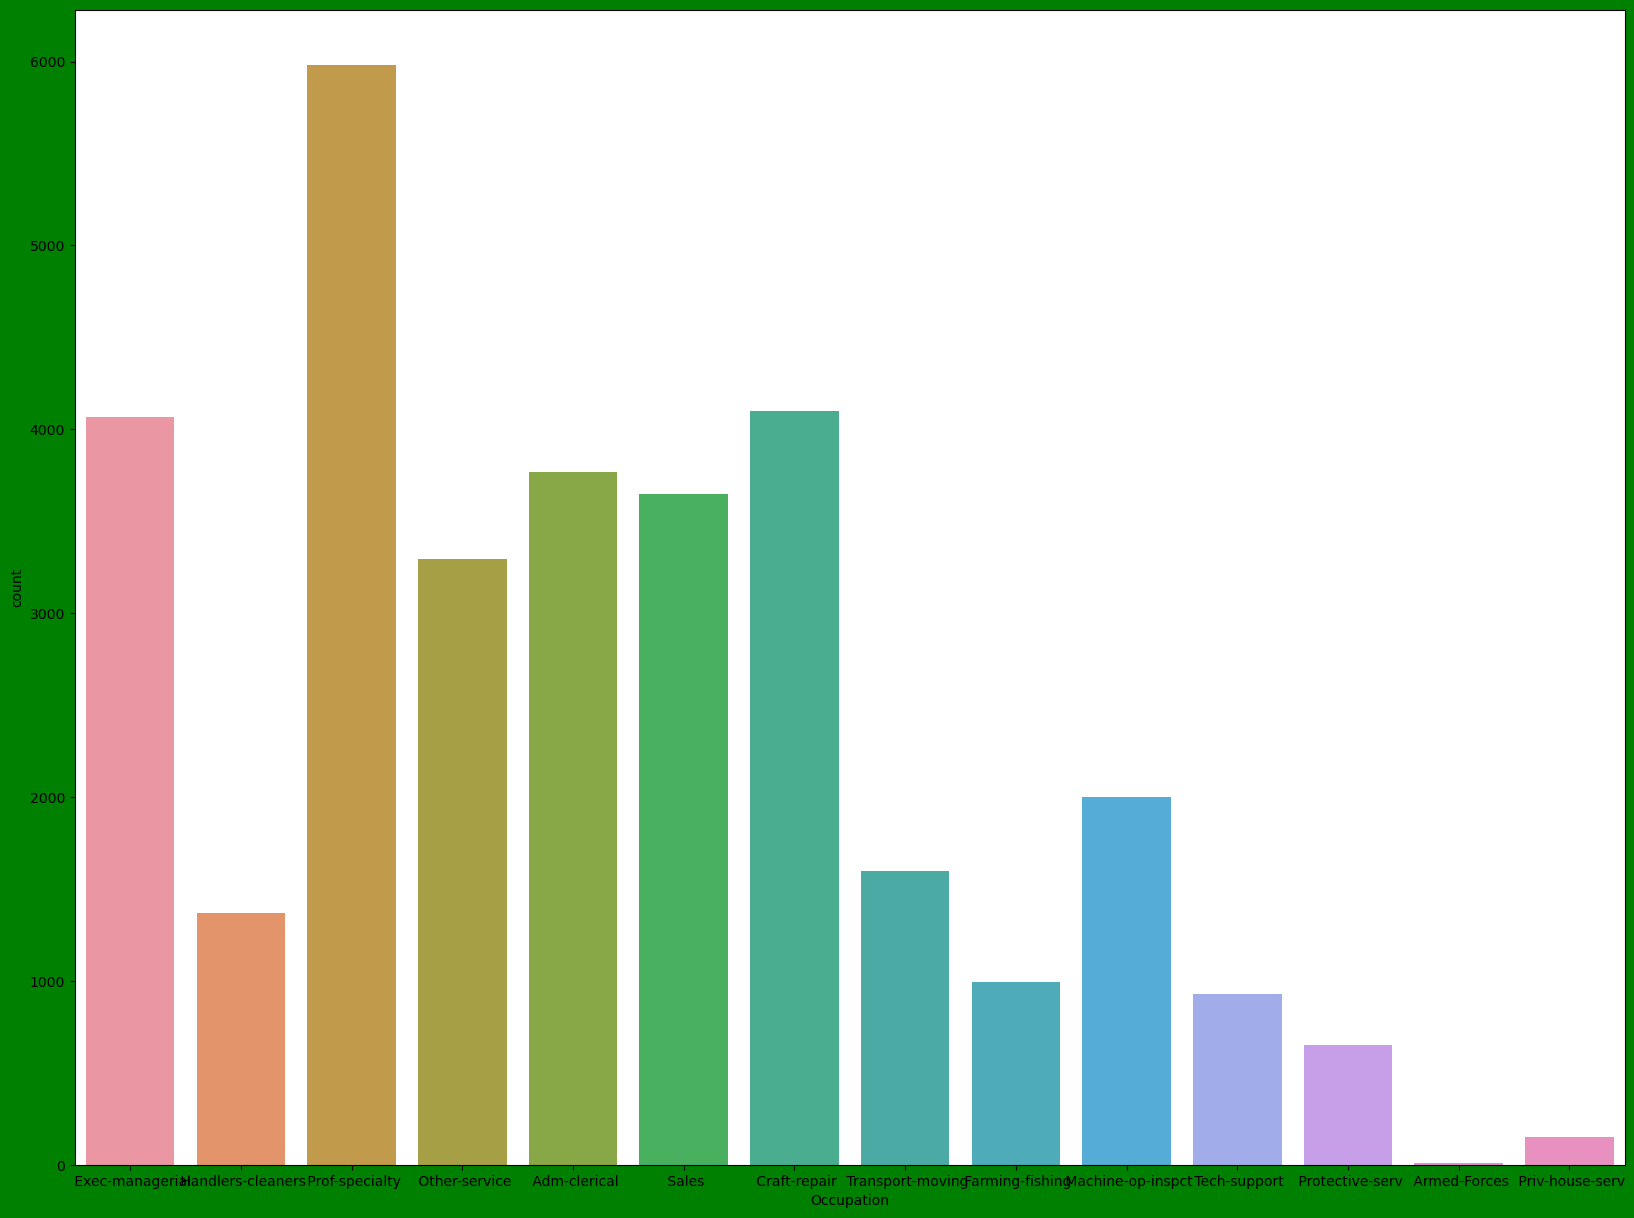

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [18]:
#Lets plot Occupation
plt.figure(figsize=(20,15),facecolor='green')
sns.countplot(x='Occupation',data=data)
plt.show()
data.Occupation.value_counts()

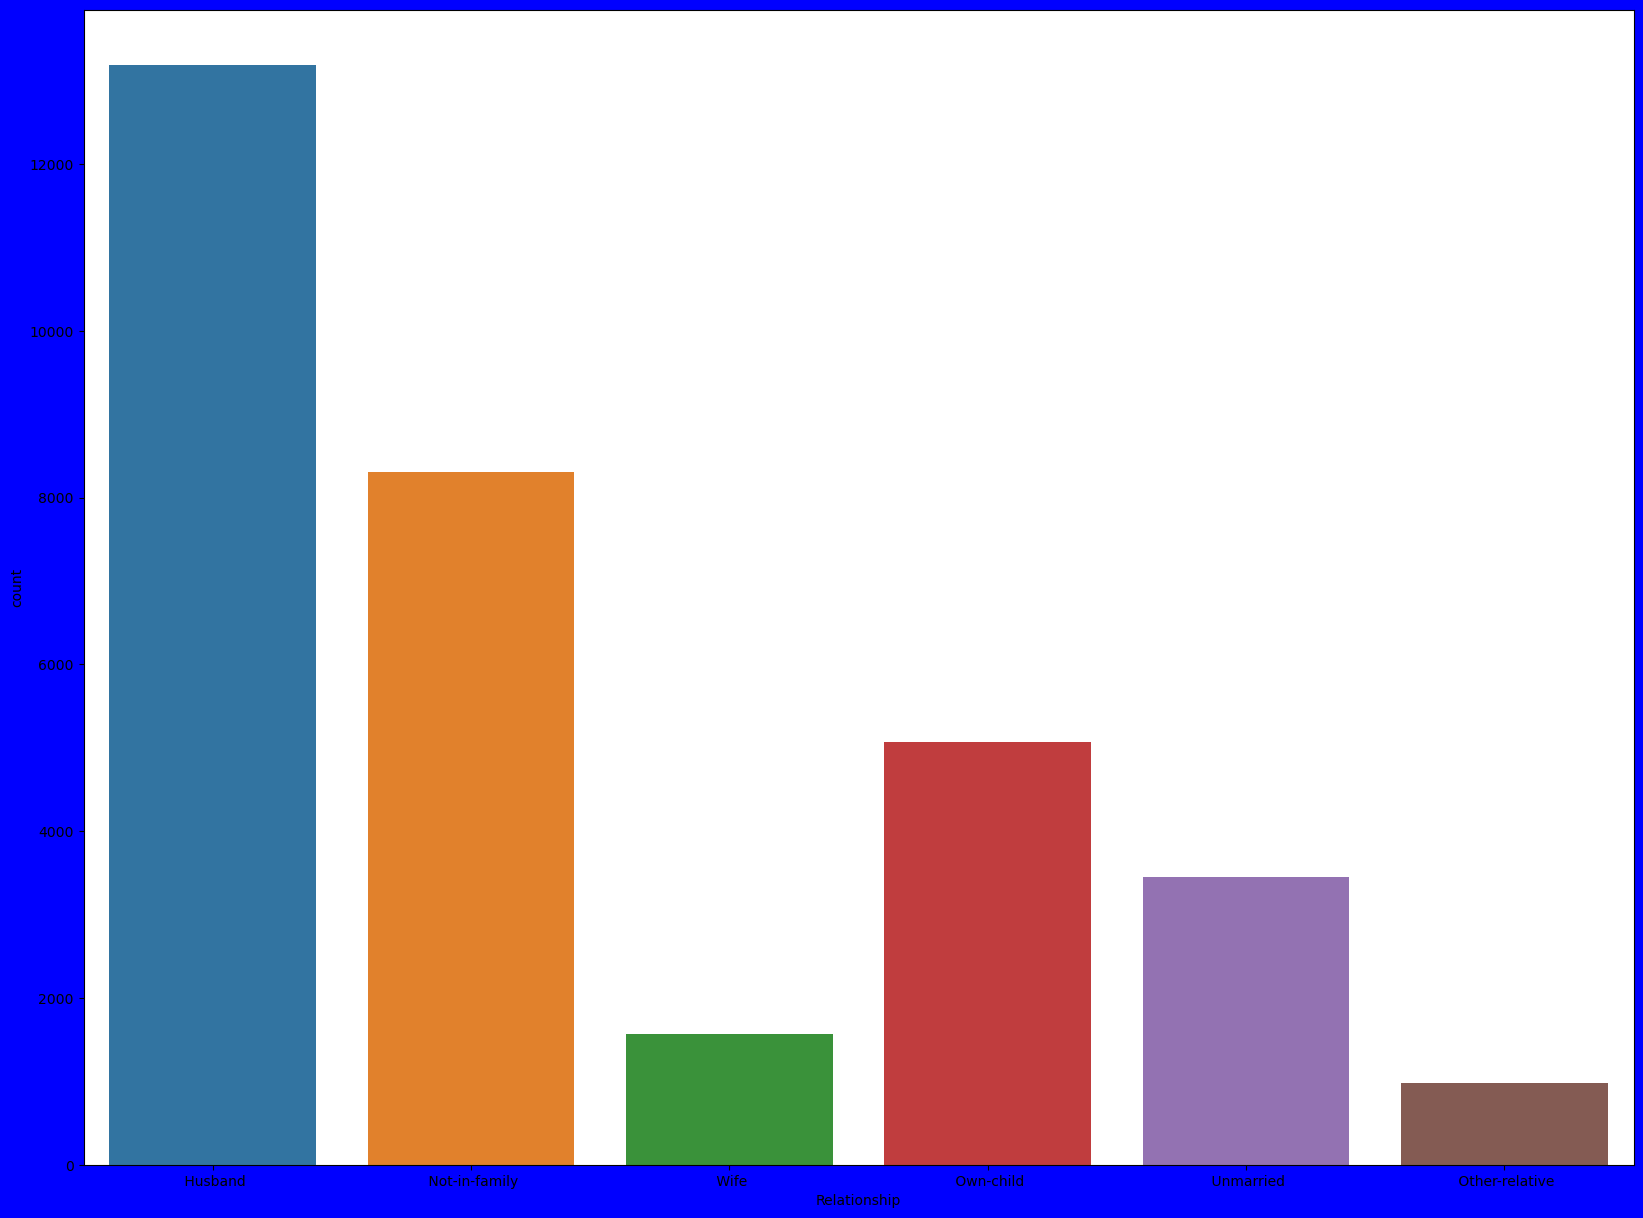

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [19]:
#Lets plot for Relationship
plt.figure(figsize=(20,15),facecolor='blue')
sns.countplot(x='Relationship',data=data)
plt.show()
data.Relationship.value_counts()

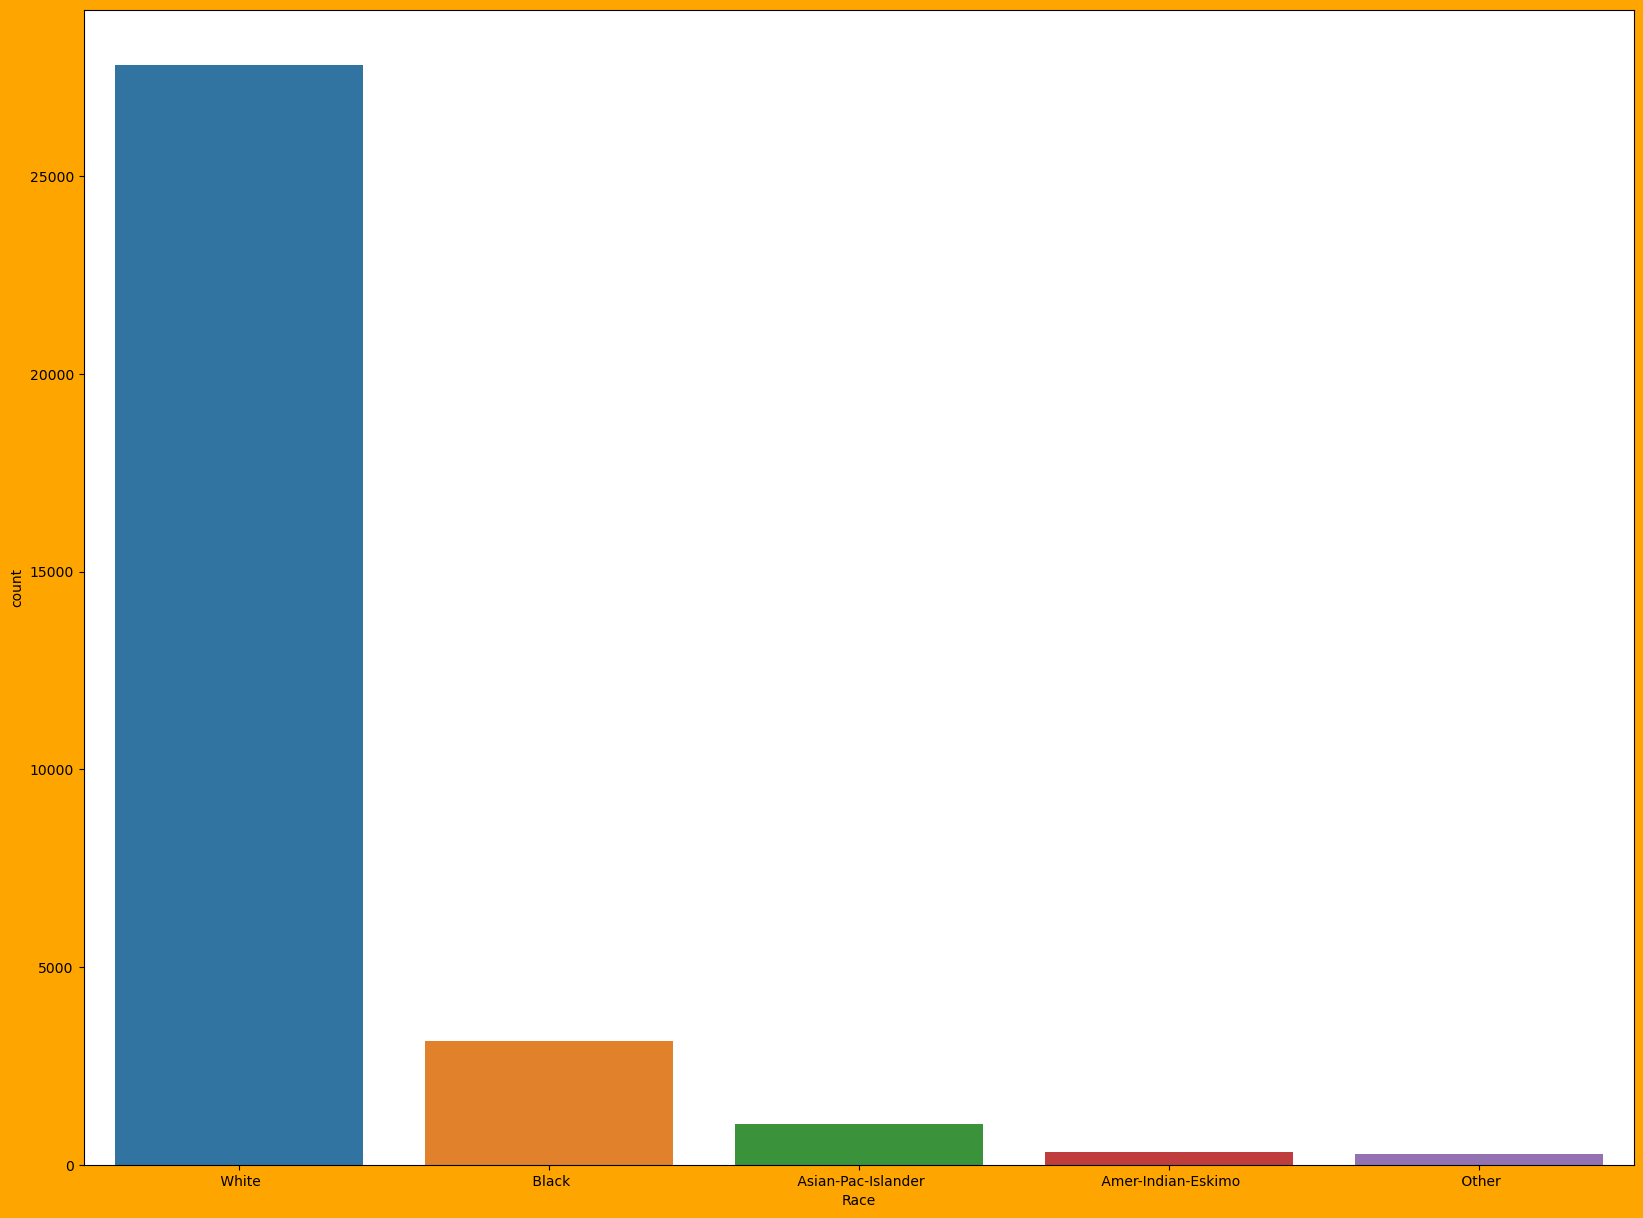

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [20]:
#Lets plot Race
plt.figure(figsize=(20,15),facecolor='orange')
sns.countplot(x='Race',data=data)
plt.show()
data.Race.value_counts()

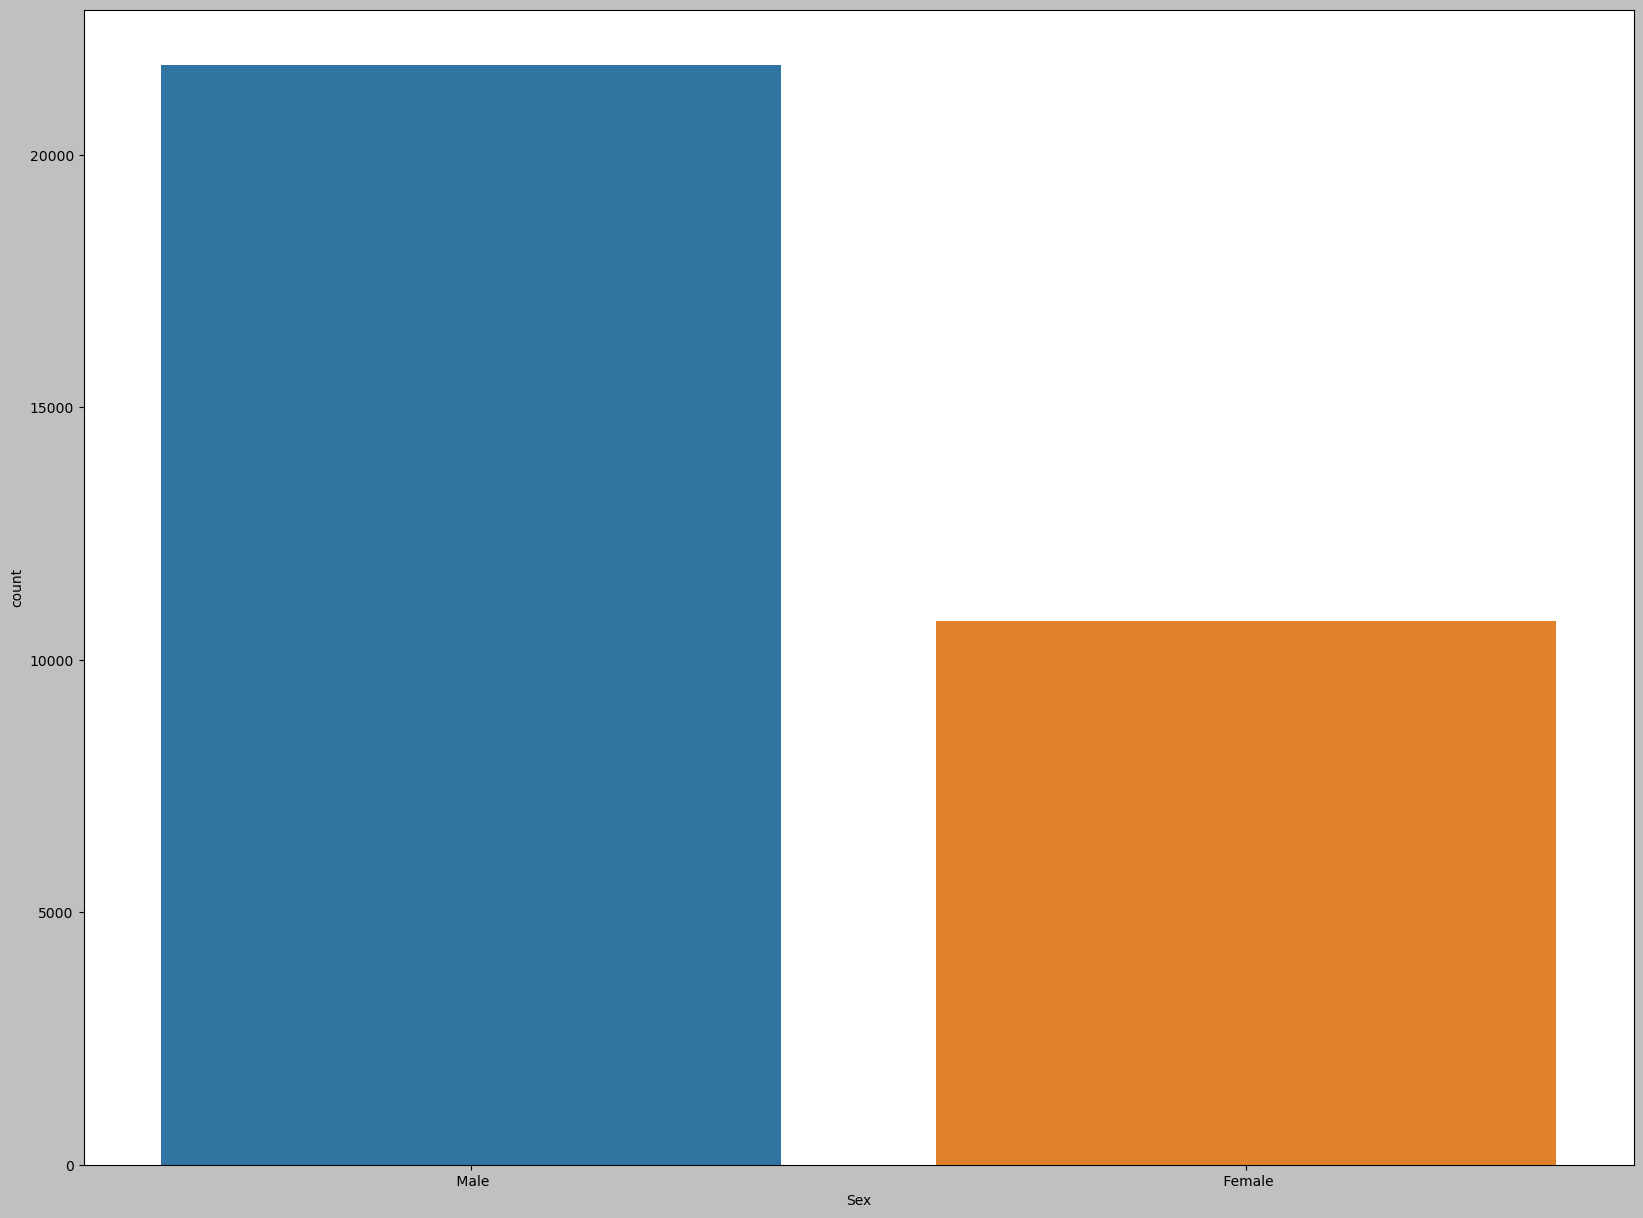

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [21]:
#Lets plot Sex
plt.figure(figsize=(20,15),facecolor='silver')
sns.countplot(x='Sex',data=data)
plt.show()
data.Sex.value_counts()

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

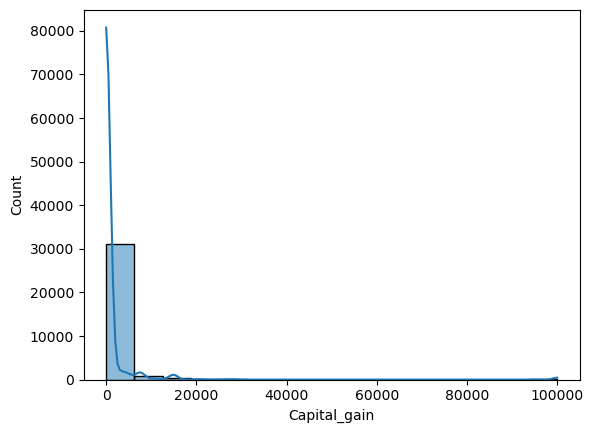

In [22]:
#Lets plot for Capital_gain
sns.histplot(data['Capital_gain'],kde=True)

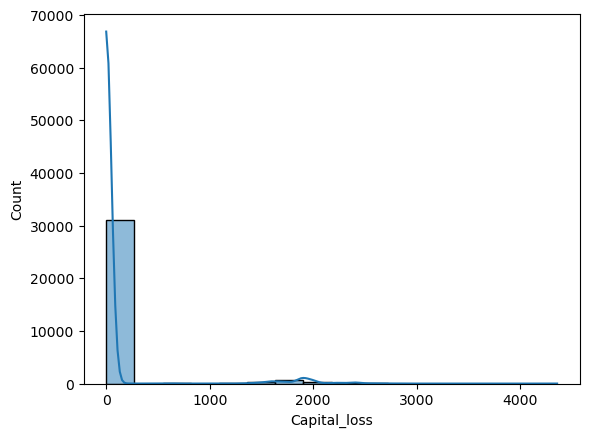

In [23]:
#Lets plot for Capital_loss
sns.histplot(data['Capital_loss'],kde=True)
plt.show()

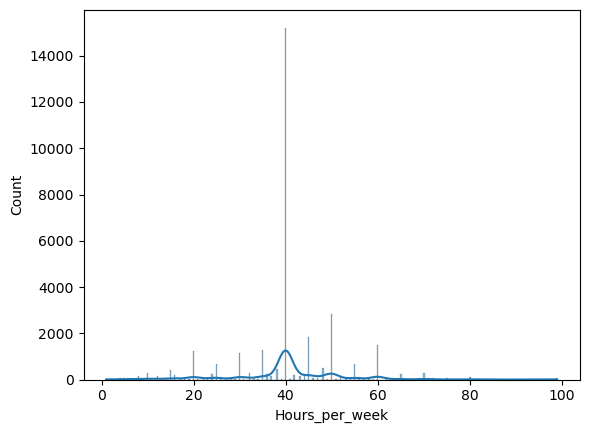

In [24]:
#Lets plot for Hours_per_week
sns.histplot(data['Hours_per_week'],kde=True)
plt.show()

Here we can see that maximum 40 hours_per_week people do .

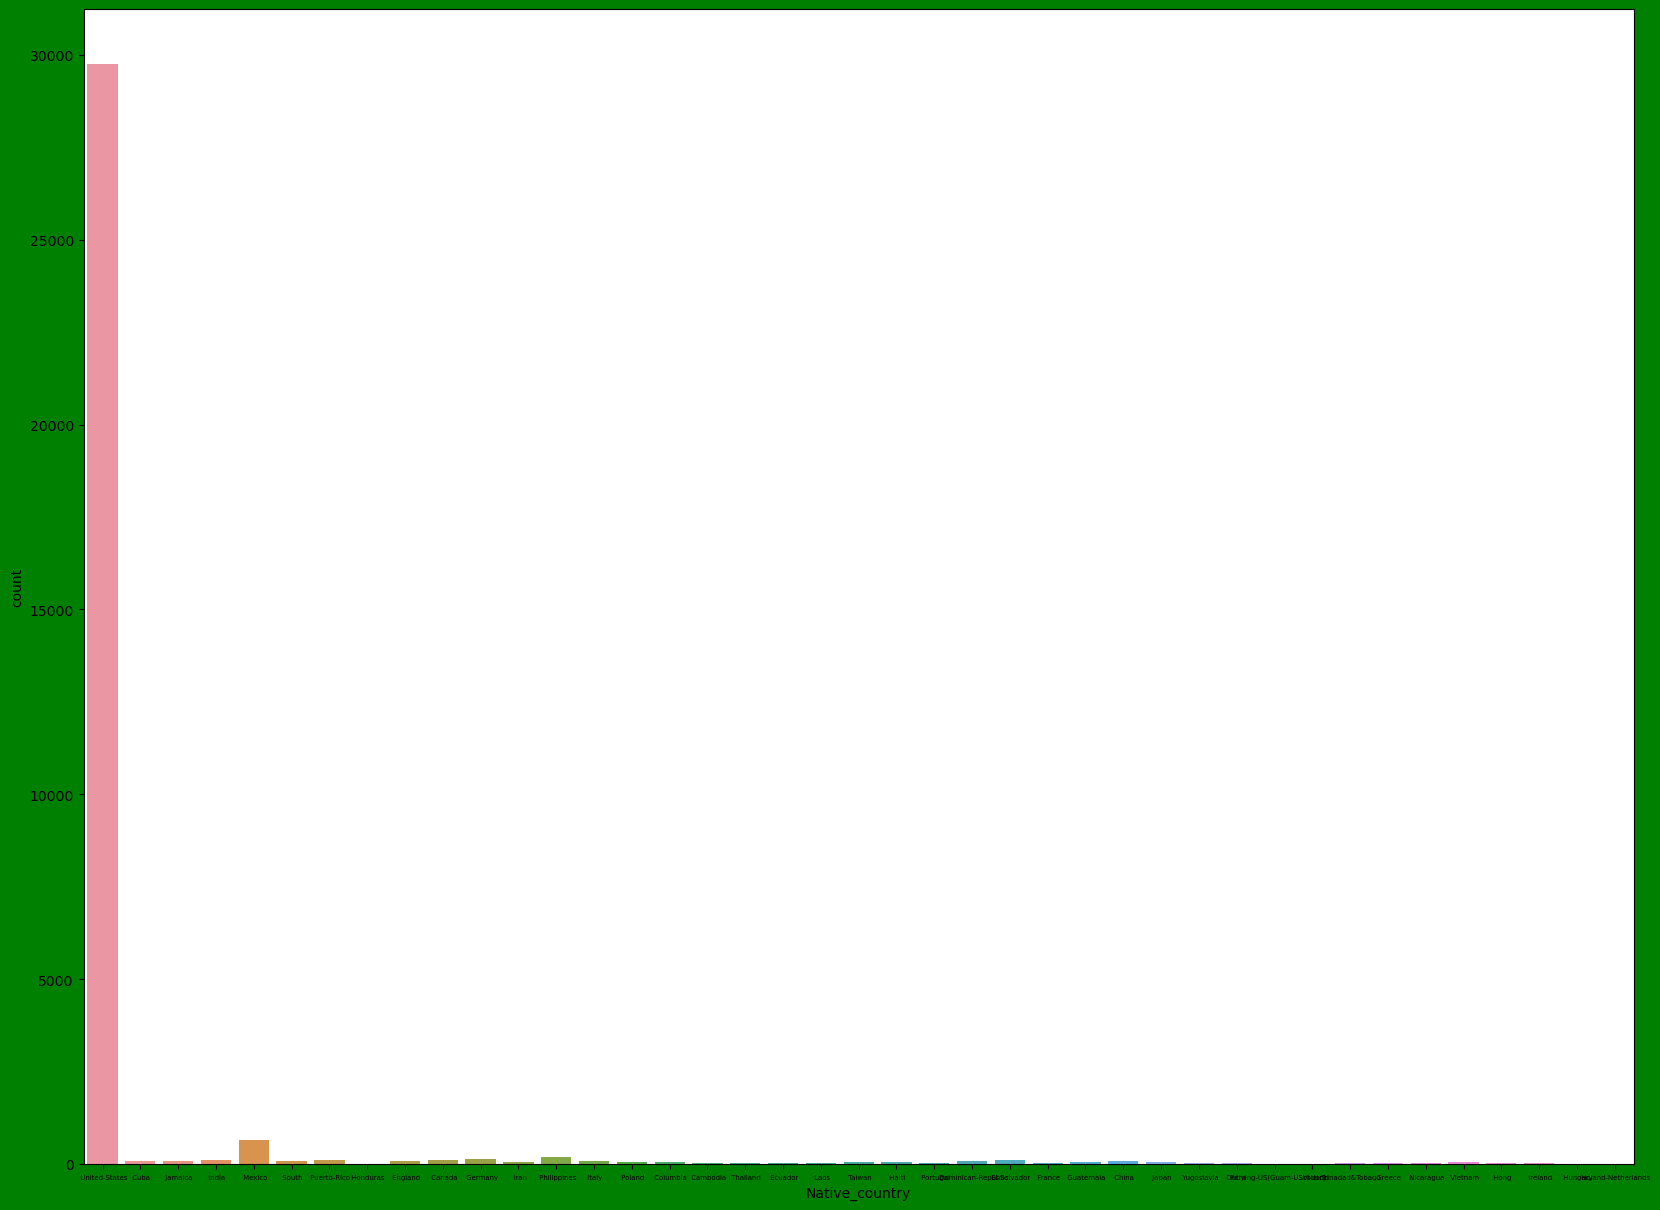

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [25]:
#Lets plot Native_country
plt.figure(figsize=(20,15),facecolor='green')
sns.countplot(x='Native_country',data=data)
plt.xticks(size=5)

plt.show()
data.Native_country.value_counts()

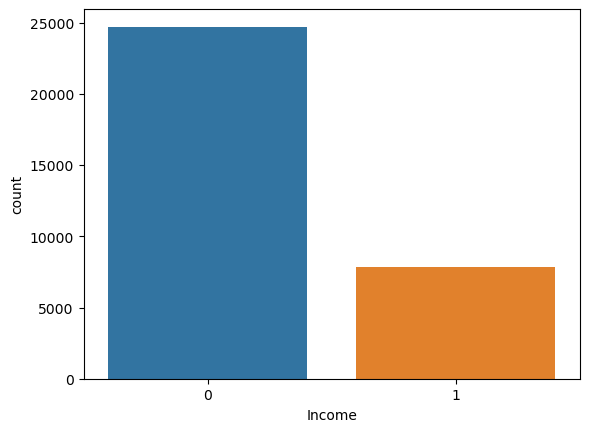

In [26]:
#Lets plot for Income
sns.countplot(x='Income',data=data)
plt.show()

So , Here we can see the data out target variable is imbalanced . Lets make it balanced my using SMOTE method but not now . 

# Multivariate Analysis 

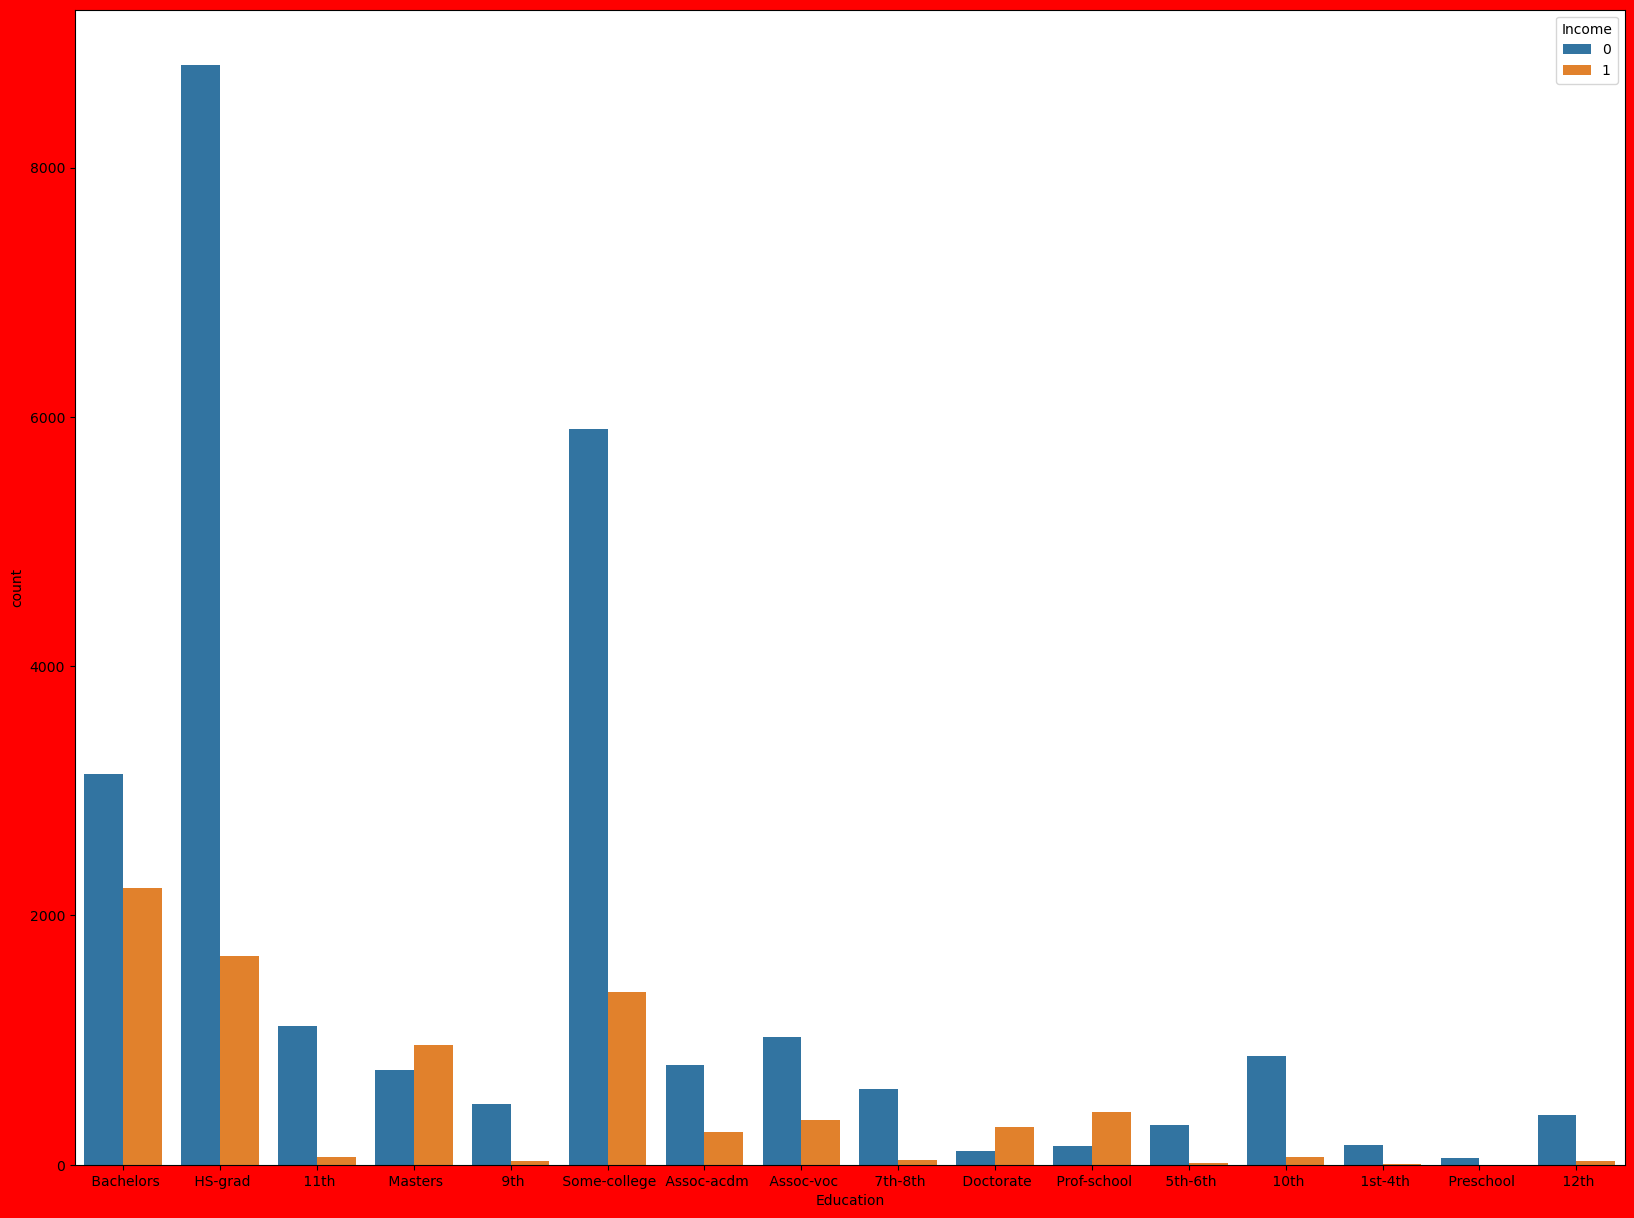

In [27]:
#Lets plot for education and Income
plt.figure(figsize=(20,15),facecolor='red')
sns.countplot(x='Education',hue='Income',data=data)
plt.show()

HS grad have highest job whihc is <50K

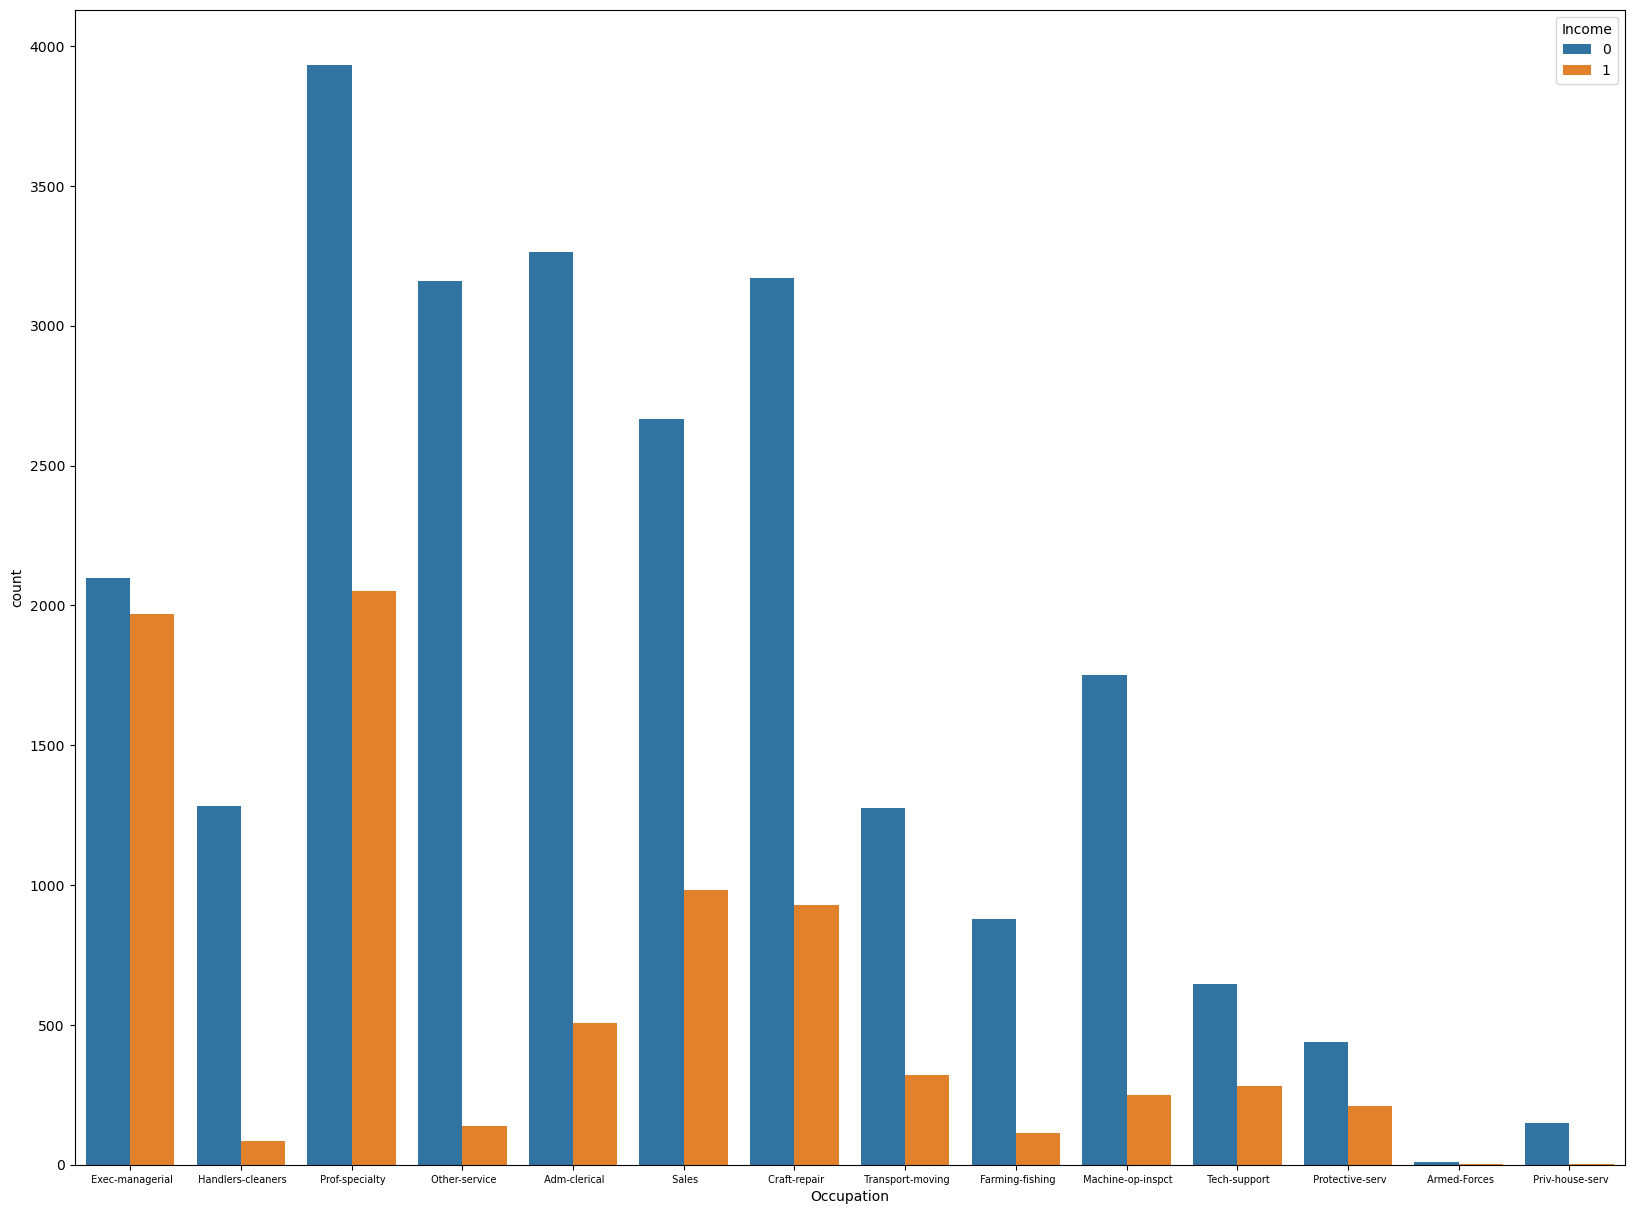

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [28]:
#Lets plot for occupation and income
plt.figure(figsize=(20,15))
sns.countplot(x='Occupation',hue='Income',data=data)
plt.xticks(size=7)
plt.show()
data.Occupation.value_counts()

Maximum people have Prof-specialty

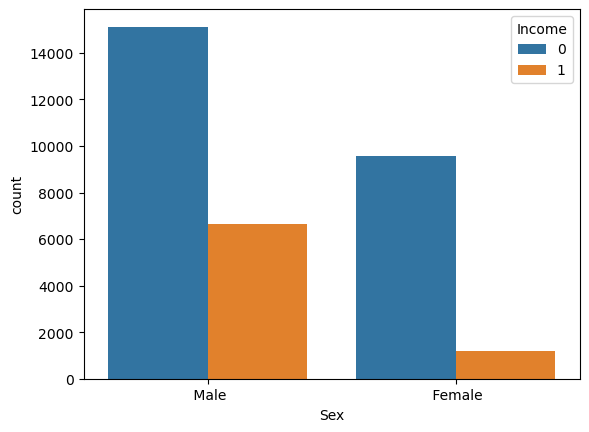

In [29]:
#Lets check Sex and income
sns.countplot(x='Sex',hue='Income',data=data)
plt.show()

Here we can see that Female is less compare to Male

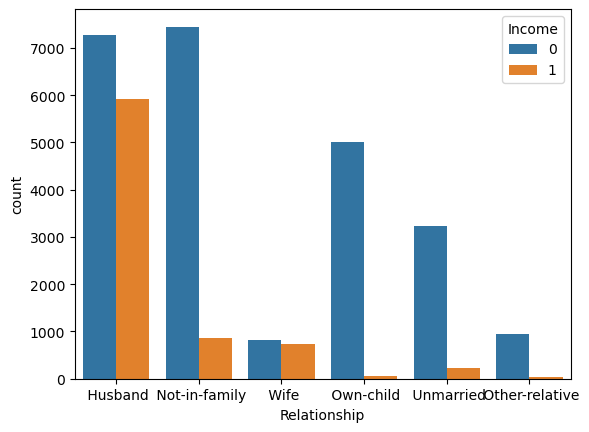

In [30]:
#Lets plot for relationship and Income
sns.countplot(x='Relationship',hue='Income',data=data)
plt.show()

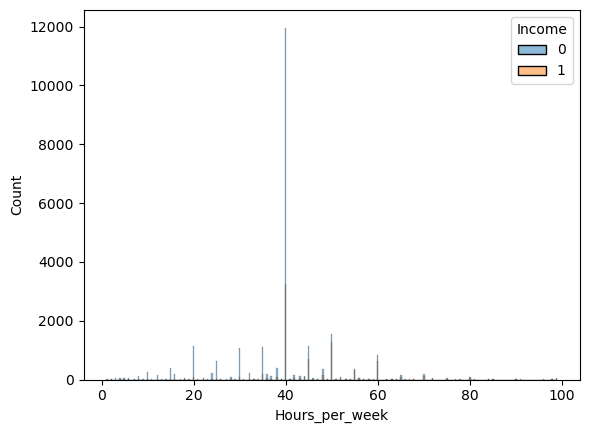

In [31]:
#Lets check with Hours per Week
sns.histplot(x='Hours_per_week',hue='Income',data=data)
plt.show()

Maximum peoplr have woking 40 hours per week

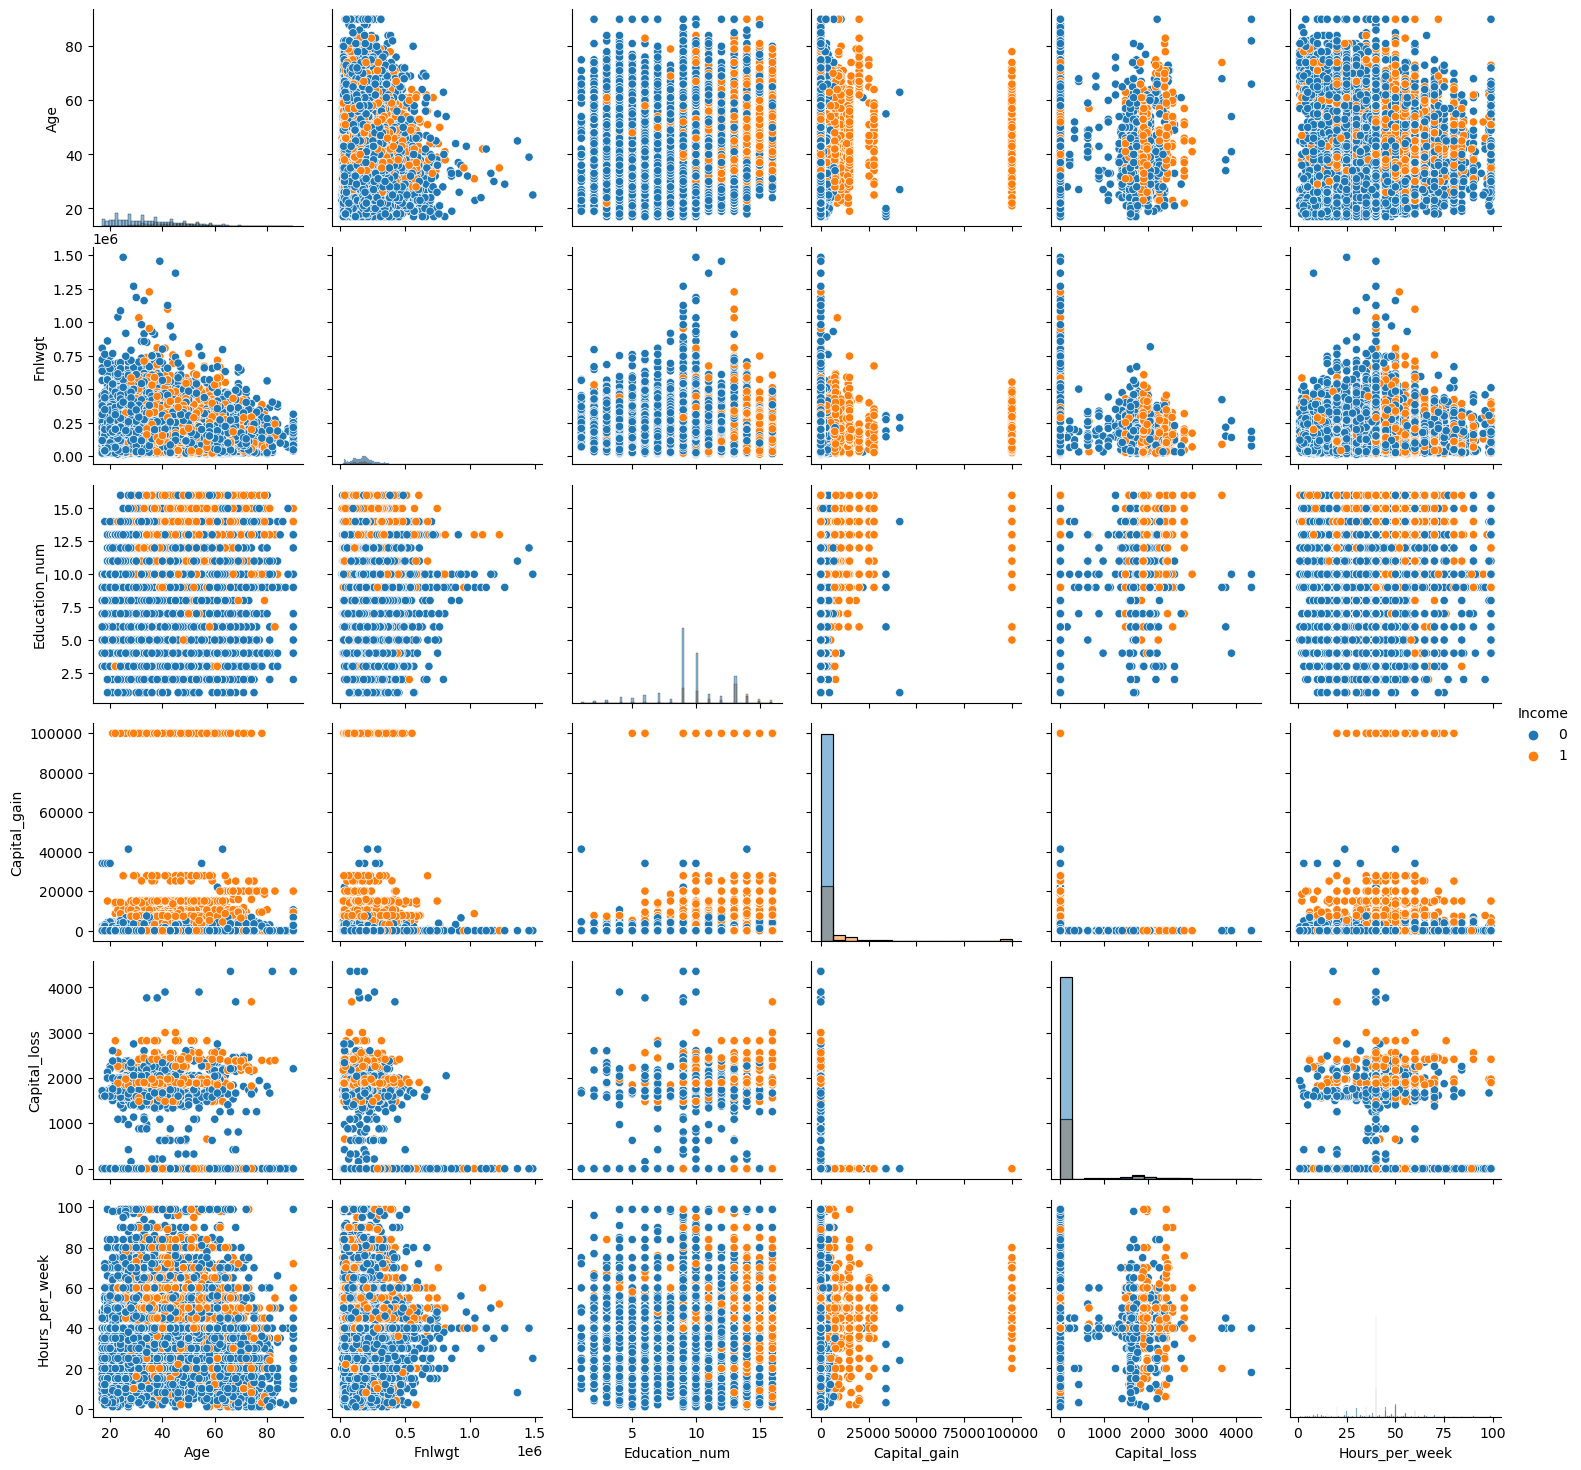

In [32]:
# Checking the pairwise relation between the features and label capacity in megawatt.
g = sns.PairGrid(data, hue="Income")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

# Lets Check for Ouliers

In [33]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']


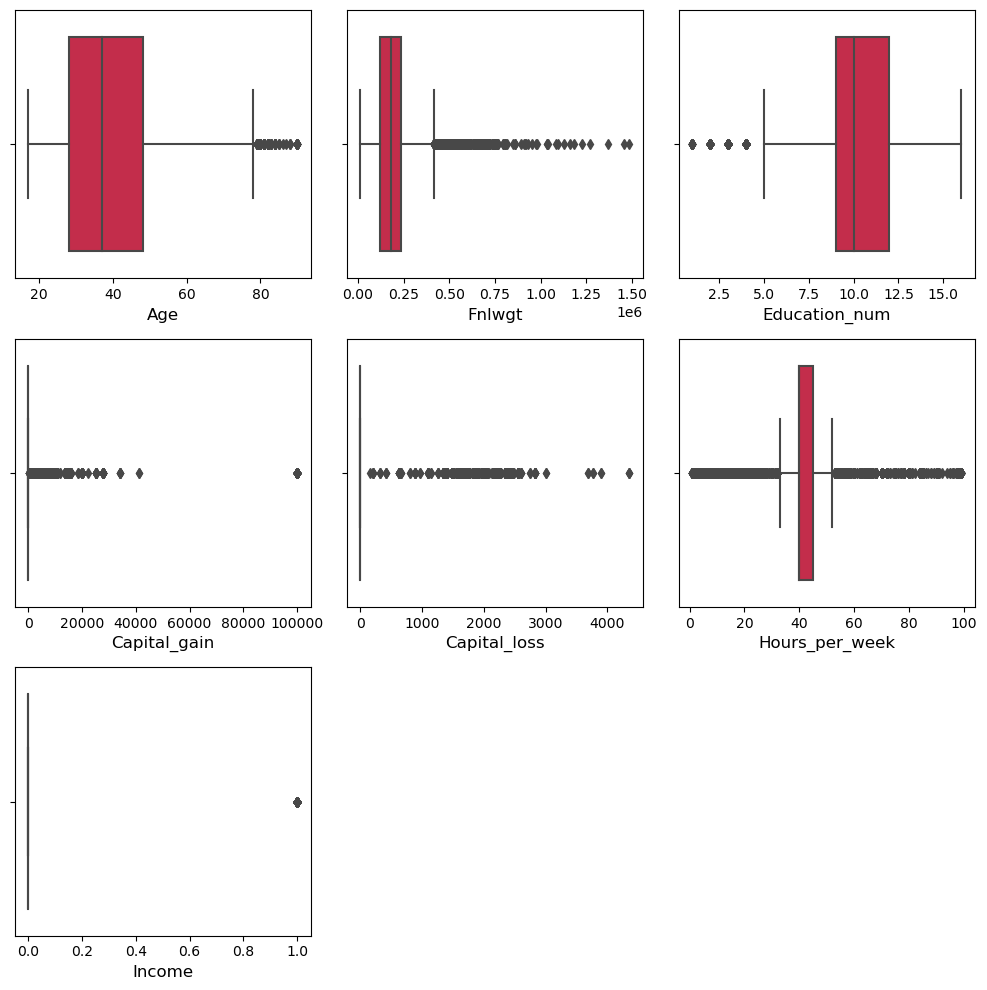

In [34]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


Almost all columns have outliers . lets remove outliers using Z score

# Lets Remove outliers

In [35]:
import numpy as np
from scipy.stats import zscore

In [36]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [37]:
features = data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]



In [38]:
# Using zscore to remove outliers

z=np.abs(zscore(features))

z


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [39]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [40]:
# Shape of original dataset
data.shape

(32560, 15)

In [41]:
#Before removing the outliers we had 907 rows and 13 columns.
new_df.shape

(29827, 15)

In [42]:

# Checking the the data loss
data_loss = (32560-29827)/32560*100
data_loss


8.393734643734643

Using Zscore i have 8.39% data loss.Which is less than 10%.But still let me have a look into IQR method also.

# ii) IQR (Inter Quantile Range) method

In [43]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [44]:
df1.shape

(18997, 15)

Using IQR method the dataframe has 18997 rows and 15 columns.

In [45]:
# Let's check the dataloss
data_loss = (32560-18997)/32560*100
data_loss


41.6554054054054

Using IQR method we are losing 41% of data, so considering Zscore method for better result.

# Encoding the categorical columns using Label Encoding

In [46]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [47]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation','Relationship','Race','Native_country','Sex']

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [49]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Native_country,Sex
0,5,8,2,3,0,4,37,1
1,3,10,0,5,1,4,37,1
2,3,1,2,5,0,2,37,1
3,3,8,2,9,5,2,4,0
4,3,11,2,3,5,4,37,0
...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,37,0
32556,3,10,2,6,0,4,37,1
32557,3,10,6,0,4,4,37,0
32558,3,10,4,0,3,4,37,1


# Correlation between the target variable and features using HEAT map

In [50]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.033011,-0.074427,-0.004827,0.041426,-0.285664,-0.002601,-0.266795,0.027973,0.086565,0.131044,0.020825,0.092195,-0.001635,0.239373
Workclass,0.033011,1.000000,-0.023070,0.002705,-0.000664,-0.016131,0.008167,-0.057641,0.045449,0.068847,0.011970,-0.010143,0.027275,-0.001669,-0.007196
Fnlwgt,-0.074427,-0.023070,1.000000,-0.023258,-0.037439,0.029274,-0.002072,0.008238,-0.010477,0.028434,-0.002353,0.002582,-0.015376,-0.060748,-0.009076
Education,-0.004827,0.002705,-0.023258,1.000000,0.361143,-0.037297,-0.042788,-0.012823,0.015554,-0.027965,0.027106,-0.000931,0.060247,0.071737,0.074586
Education_num,0.041426,-0.000664,-0.037439,0.361143,1.000000,-0.058990,0.069773,-0.096523,0.028547,0.009142,0.154822,0.009483,0.150517,0.058212,0.318600
Marital_status,-0.285664,-0.016131,0.029274,-0.037297,-0.058990,1.000000,0.035527,0.184776,-0.066197,-0.123321,-0.068310,-0.013822,-0.195285,-0.016976,-0.194458
Occupation,-0.002601,0.008167,-0.002072,-0.042788,0.069773,0.035527,1.000000,-0.036641,-0.003297,0.049840,0.009578,-0.001849,-0.022763,-0.001645,0.030684
Relationship,-0.266795,-0.057641,0.008238,-0.012823,-0.096523,0.184776,-0.036641,1.000000,-0.116297,-0.577083,-0.090318,0.028831,-0.257918,-0.011042,-0.245894
Race,0.027973,0.045449,-0.010477,0.015554,0.028547,-0.066197,-0.003297,-0.116297,1.000000,0.089770,0.023510,0.001321,0.045336,0.117186,0.071742
Sex,0.086565,0.068847,0.028434,-0.027965,0.009142,-0.123321,0.049840,-0.577083,0.089770,1.000000,0.070782,-0.026347,0.233912,0.002205,0.209938


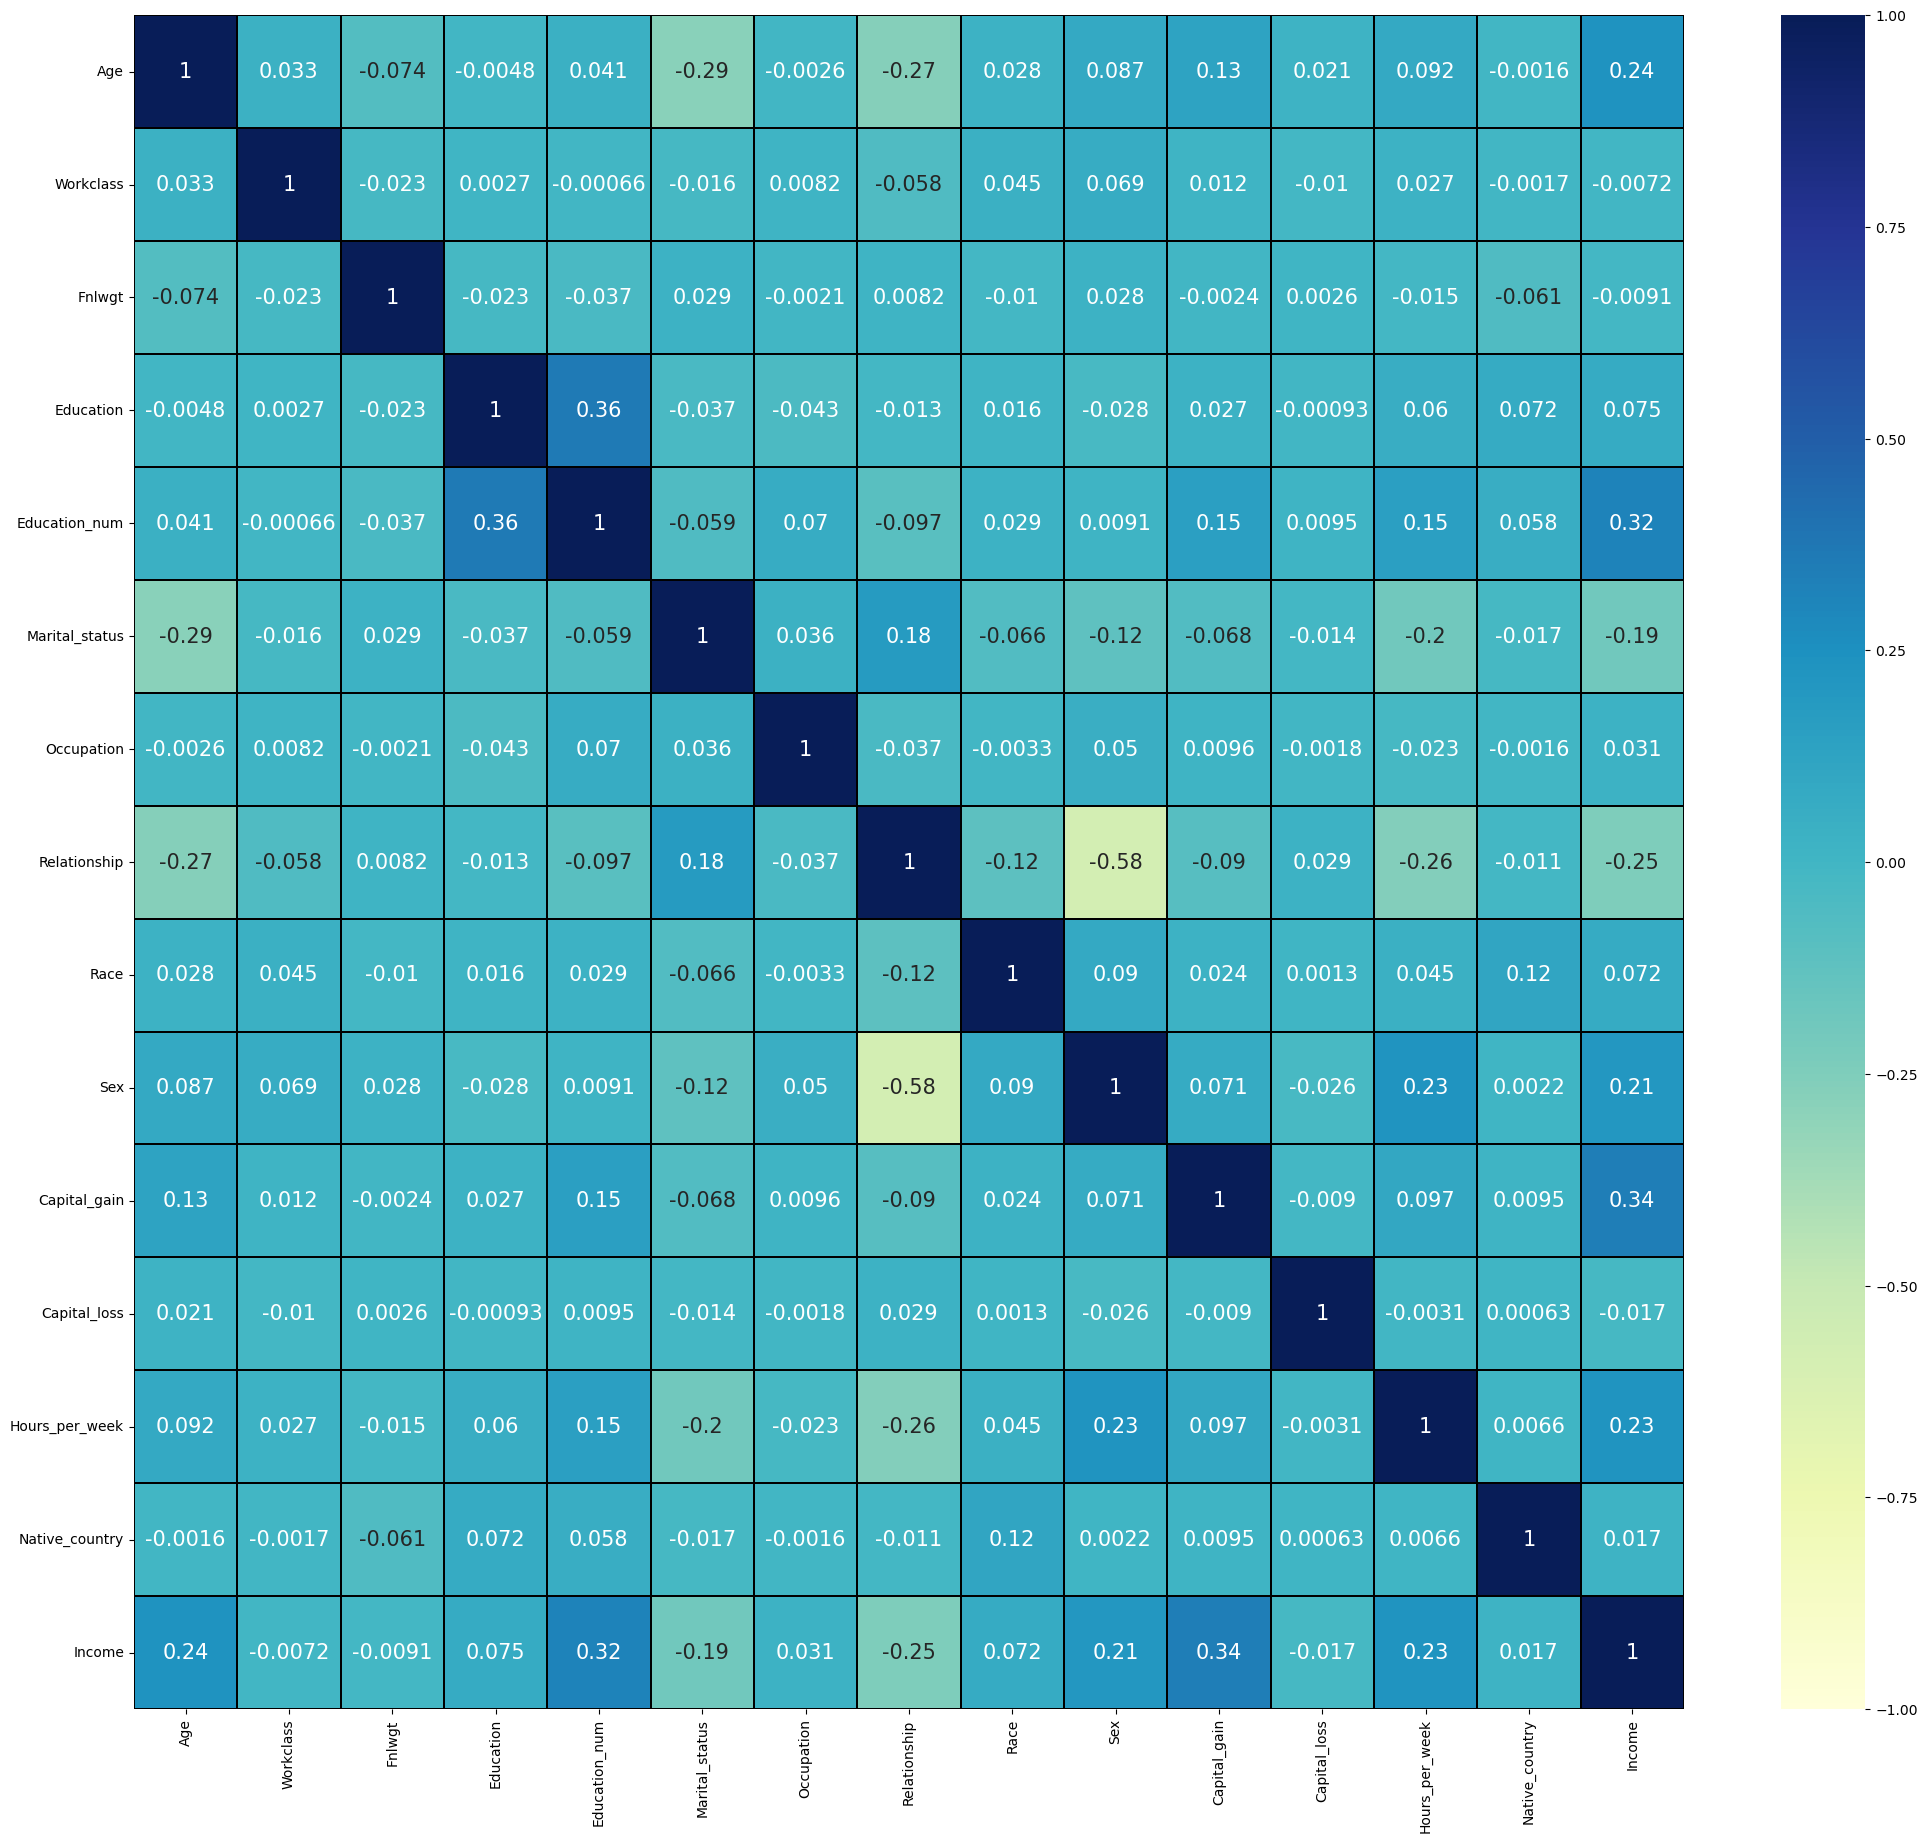

In [51]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);


Workclass,Fnlwgt, - Has very less correlation with Income

Capital_gain,Education_num,Age - Has correlated with Income Columns


Negatively Correlated - Marital_status, Relationship





# Visualizing the correlation between label(primary_fuel) and features using bar plot

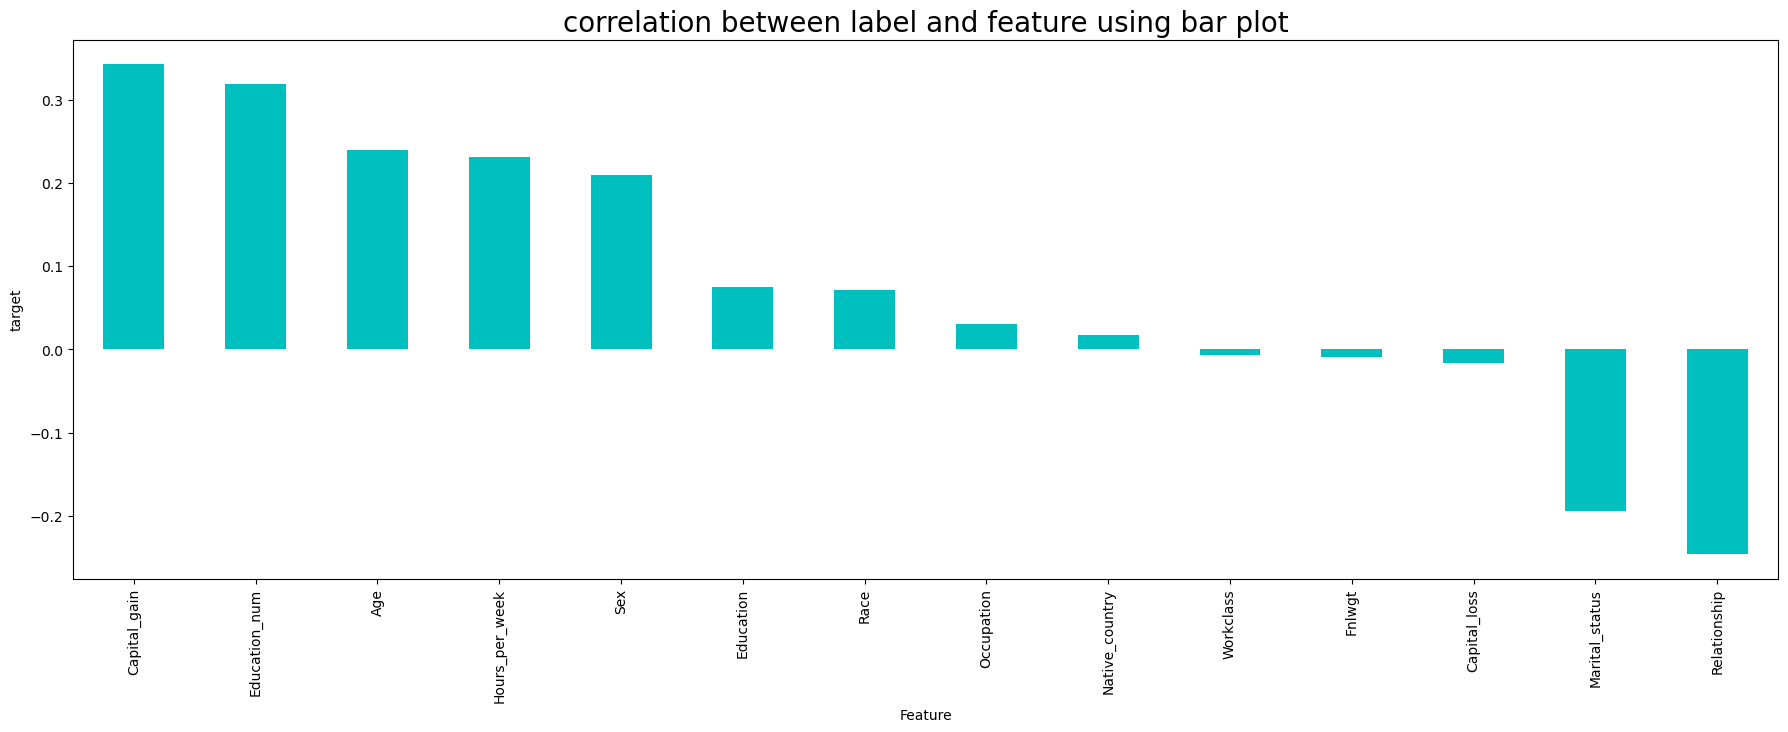

In [52]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


After see this i decided to delete workclass , fnlwgt and , Native Country and Capital loss has no relation 

In [53]:
#Droping less correlated column
new_df =new_df.drop(["Native_country"],axis=1)
new_df =new_df.drop(["Workclass"],axis=1)
new_df =new_df.drop(["Fnlwgt"],axis=1)
new_df =new_df.drop(["Capital_loss"],axis=1)


In [54]:
new_df.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Income
0,50,8,13,2,3,0,4,1,0,13,0
1,38,10,9,0,5,1,4,1,0,40,0
2,53,1,7,2,5,0,2,1,0,40,0
3,28,8,13,2,9,5,2,0,0,40,0
4,37,11,14,2,3,5,4,0,0,40,0


#  Prediction 

In [55]:
x = new_df.drop("Income", axis=1)
y = new_df["Income"]


In [56]:
#Lets check for the shape of the x
x.shape

(29827, 10)

In [57]:
#Lets check for the shape of y
y.shape

(29827,)

# Checking for skewness

In [58]:
x.skew()

Age               0.491112
Education        -1.073426
Education_num    -0.170298
Marital_status   -0.048971
Occupation        0.005826
Relationship      0.743825
Race             -2.436068
Sex              -0.680003
Capital_gain      4.943642
Hours_per_week   -0.354170
dtype: float64

So , Here we have to remove skewness but not for Categorical columns.
Age column is not skewed

Capital_gain,Education_num,Hours_per_week   using Yeo Johnson method



# Removing skewness using yeo_johnson method¶

In [59]:
skew = ["Capital_gain","Education_num","Hours_per_week"]

In [60]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [61]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()


,Capital_gain,Education_num,Hours_per_week
0,-0.296683,1.210036,-2.216936
1,-0.296683,-0.464972,-0.036488
2,-0.296683,-1.249143,-0.036488
3,-0.296683,1.210036,-0.036488
4,-0.296683,1.647791,-0.036488


In [62]:

# Checking skewness after using yeo-johnson ethod
x.skew()

Age               0.491112
Education        -1.073426
Education_num     0.023097
Marital_status   -0.048971
Occupation        0.005826
Relationship      0.743825
Race             -2.436068
Sex              -0.680003
Capital_gain      3.074074
Hours_per_week    0.107834
dtype: float64

Now we have removed the skewness in all the numerical columns

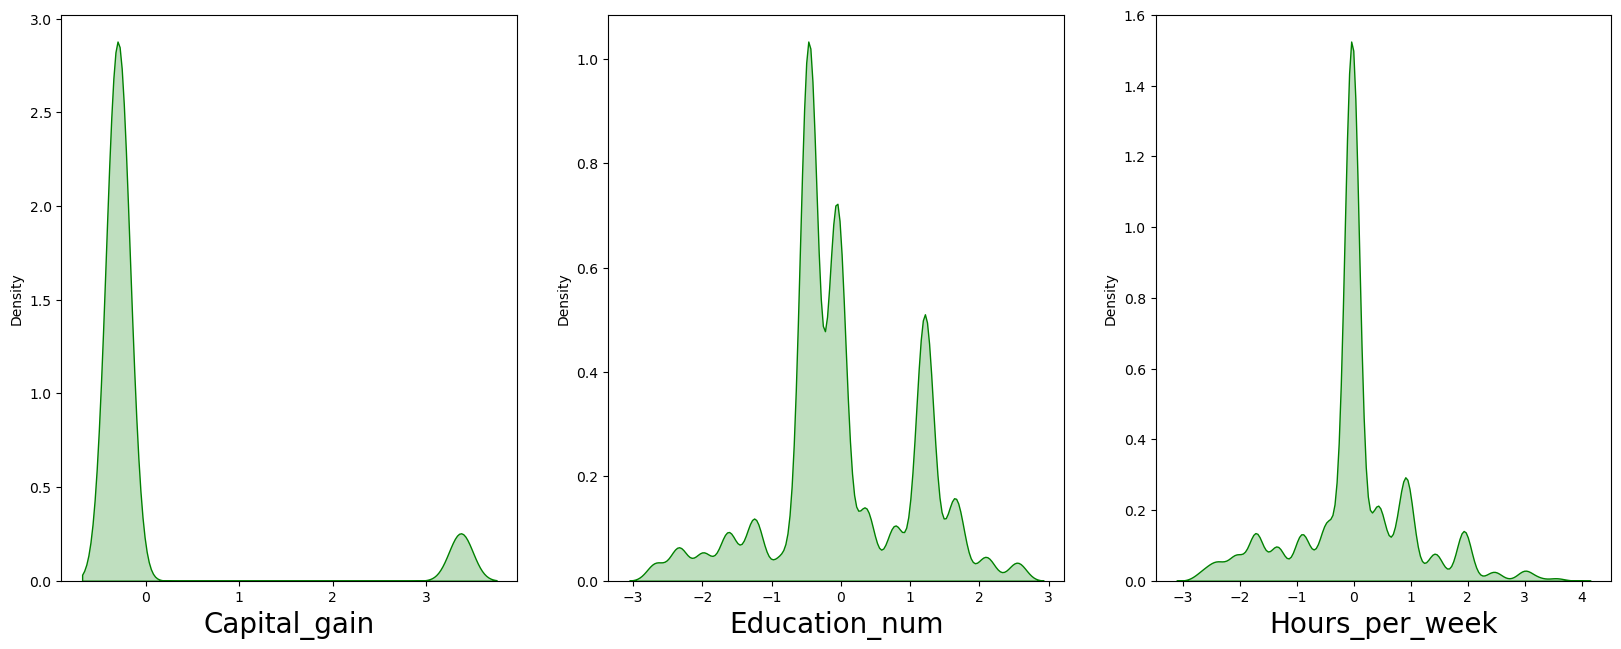

In [63]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Resolving the class imbalance issue in label column

In [64]:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [67]:
y.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week
0,0.781663,-0.422570,0.971692,-0.311593,-0.794608,-0.721401,0.362570,0.621645,-0.383008,-2.499056
1,-0.168033,0.223535,-0.664067,-1.836123,-0.290292,-0.111491,0.362570,0.621645,-0.383008,-0.190026
2,1.019087,-2.683937,-1.429862,-0.311593,-0.290292,-0.721401,-2.136672,0.621645,-0.383008,-0.190026
3,-0.959446,-0.422570,0.971692,-0.311593,0.718339,2.328149,-2.136672,-1.608635,-0.383008,-0.190026
4,-0.247174,0.546588,1.399189,-0.311593,-0.794608,2.328149,0.362570,-1.608635,-0.383008,-0.190026


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Checking VIF values

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.161634,Age
1,1.072278,Education
2,1.144123,Education_num
3,1.134869,Marital_status
4,1.019520,Occupation
5,1.984904,Relationship
6,1.017188,Race
7,1.833005,Sex
8,1.038362,Capital_gain
9,1.153098,Hours_per_week


So here we set threshold for 10 . There is no multicollinearity . probelm

# Lets Build Model

In [70]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier()

In [71]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9674991908512245
 At random state 0 , the testing accuracy is :- 0.8778856526429342
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.89      0.86      0.88      4687
           1       0.86      0.90      0.88      4583

    accuracy                           0.88      9270
   macro avg       0.88      0.88      0.88      9270
weighted avg       0.88      0.88      0.88      9270

 At random state 0 , the Confusion matrix is :- [[4033  654]
 [ 478 4105]]


 At random state 1 , the testing accuracy is :- 0.96712158808933
 At random state 1 , the testing accuracy is :- 0.8816612729234089
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4634
           1       0.87      0.90      0.88      4636

    accuracy                           0.88      9270
   macro avg      

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
#write one fucntion and call as many times to check accuracy_score of different models 

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [75]:
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9667709569532852
======================Testing Score====================
Accuracy Score==>   0.8882416396979503
Classification Report==>                precision    recall  f1-score   support

           0       0.90      0.87      0.89      4616
           1       0.88      0.90      0.89      4654

    accuracy                           0.89      9270
   macro avg       0.89      0.89      0.89      9270
weighted avg       0.89      0.89      0.89      9270

Confusion Matrix==>  [[4034  582]
 [ 454 4200]]
Cross Validation Score: 88.21919511547638


# Finding best random state for building LogisticRegression Models

In [76]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7565001618297551
 At random state 0 , the testing accuracy is :- 0.754908306364617
 At random state 0 , the testing accuracy is :- [[3451 1236]
 [1036 3547]]


 At random state 1 , the testing accuracy is :- 0.7559337576869134
 At random state 1 , the testing accuracy is :- 0.7550161812297734
 At random state 1 , the testing accuracy is :- [[3461 1173]
 [1098 3538]]


 At random state 2 , the testing accuracy is :- 0.7547470061495307
 At random state 2 , the testing accuracy is :- 0.7579288025889968
 At random state 2 , the testing accuracy is :- [[3462 1154]
 [1090 3564]]


 At random state 3 , the testing accuracy is :- 0.7553403819182221
 At random state 3 , the testing accuracy is :- 0.7583603020496225
 At random state 3 , the testing accuracy is :- [[3527 1141]
 [1099 3503]]


 At random state 4 , the testing accuracy is :- 0.7550706656597259
 At random state 4 , the testing accuracy is :- 0.7594390507011867
 At random state 4 , th

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [79]:
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.7561225590678606
======================Testing Score====================
Accuracy Score==>   0.7588996763754046
Classification Report==>                precision    recall  f1-score   support

           0       0.77      0.75      0.76      4689
           1       0.75      0.77      0.76      4581

    accuracy                           0.76      9270
   macro avg       0.76      0.76      0.76      9270
weighted avg       0.76      0.76      0.76      9270

Confusion Matrix==>  [[3520 1169]
 [1066 3515]]
Cross Validation Score: 75.57071971936008


# Finding best random state for building KNeighborsClassifier Models¶

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn=KNeighborsClassifier()

In [83]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8870158593159996
 At random state 0 , the testing accuracy is :- 0.8375404530744337
 At random state 0 , the testing accuracy is :- [[3736  951]
 [ 555 4028]]


 At random state 1 , the testing accuracy is :- 0.8873664904520444
 At random state 1 , the testing accuracy is :- 0.8411003236245954
 At random state 1 , the testing accuracy is :- [[3705  929]
 [ 544 4092]]


 At random state 2 , the testing accuracy is :- 0.8857481929010681
 At random state 2 , the testing accuracy is :- 0.8440129449838187
 At random state 2 , the testing accuracy is :- [[3688  928]
 [ 518 4136]]


 At random state 3 , the testing accuracy is :- 0.8878250080914878
 At random state 3 , the testing accuracy is :- 0.8386192017259978
 At random state 3 , the testing accuracy is :- [[3710  958]
 [ 538 4064]]


 At random state 4 , the testing accuracy is :- 0.885963965907865
 At random state 4 , the testing accuracy is :- 0.8419633225458468
 At random state 4 , th

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8858021361527673
======================Testing Score====================
Accuracy Score==>   0.8496224379719526
Classification Report==>                precision    recall  f1-score   support

           0       0.88      0.81      0.84      4618
           1       0.82      0.89      0.86      4652

    accuracy                           0.85      9270
   macro avg       0.85      0.85      0.85      9270
weighted avg       0.85      0.85      0.85      9270

Confusion Matrix==>  [[3718  900]
 [ 494 4158]]
Cross Validation Score: 83.64913912505791


# Finding best random state for building DecisionTreeClassifier Models

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [95]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9675261624770741
 At random state 0 , the testing accuracy is :- 0.8544768069039914
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.87      0.84      0.85      4687
           1       0.84      0.87      0.86      4583

    accuracy                           0.85      9270
   macro avg       0.85      0.85      0.85      9270
weighted avg       0.85      0.85      0.85      9270

 At random state 0 , the Confusion matrix is :- [[3935  752]
 [ 597 3986]]


 At random state 1 , the testing accuracy is :- 0.9671485597151797
 At random state 1 , the testing accuracy is :- 0.8522114347357066
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4634
           1       0.85      0.86      0.85      4636

    accuracy                           0.85      9270
   macro avg    

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [90]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9662854676879923
======================Testing Score====================
Accuracy Score==>   0.863646170442287
Classification Report==>                precision    recall  f1-score   support

           0       0.87      0.85      0.86      4689
           1       0.85      0.87      0.86      4581

    accuracy                           0.86      9270
   macro avg       0.86      0.86      0.86      9270
weighted avg       0.86      0.86      0.86      9270

Confusion Matrix==>  [[4009  680]
 [ 584 3997]]
Cross Validation Score: 85.49190228578564


# Lets try With GradientBoostingClassifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [99]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    gbdt.fit(x_train,y_train)
    x_pred=gbdt.predict(x_train)
    y_pred=gbdt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8571852411263351
 At random state 0 , the testing accuracy is :- 0.8542610571736785
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4687
           1       0.83      0.89      0.86      4583

    accuracy                           0.85      9270
   macro avg       0.86      0.85      0.85      9270
weighted avg       0.86      0.85      0.85      9270

 At random state 0 , the Confusion matrix is :- [[3840  847]
 [ 504 4079]]


 At random state 1 , the testing accuracy is :- 0.8594238860718524
 At random state 1 , the testing accuracy is :- 0.851024811218986
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4634
           1       0.83      0.89      0.86      4636

    accuracy                           0.85      9270
   macro avg     

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=96)

In [101]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9466770956953285
======================Testing Score====================
Accuracy Score==>   0.9420711974110032
Classification Report==>                precision    recall  f1-score   support

           0       0.94      0.94      0.94      4680
           1       0.94      0.94      0.94      4590

    accuracy                           0.94      9270
   macro avg       0.94      0.94      0.94      9270
weighted avg       0.94      0.94      0.94      9270

Confusion Matrix==>  [[4417  263]
 [ 274 4316]]
Cross Validation Score: 85.50484517472086


So , Here i am selecting Gradient Boost Classifier 

# Lets Do Hyperparameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9466770956953285
======================Testing Score====================
Accuracy Score==>   0.9420711974110032
Classification Report==>                precision    recall  f1-score   support

           0       0.94      0.94      0.94      4680
           1       0.94      0.94      0.94      4590

    accuracy                           0.94      9270
   macro avg       0.94      0.94      0.94      9270
weighted avg       0.94      0.94      0.94      9270

Confusion Matrix==>  [[4417  263]
 [ 274 4316]]
Cross Validation Score: 85.44443408640905


In [108]:
grid_param={'max_depth':range(4,8,),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [109]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 4}

In [118]:
clf=GradientBoostingClassifier(max_depth=9,min_samples_split=6,learning_rate=0.1,)


clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=9, min_samples_split=6)

In [119]:
#Call the function and pass dataset to check train and test score 
metrics_score(clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(clf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9224565756823822
======================Testing Score====================
Accuracy Score==>   0.8932038834951457
Classification Report==>                precision    recall  f1-score   support

           0       0.91      0.88      0.89      4680
           1       0.88      0.91      0.89      4590

    accuracy                           0.89      9270
   macro avg       0.89      0.89      0.89      9270
weighted avg       0.89      0.89      0.89      9270

Confusion Matrix==>  [[4112  568]
 [ 422 4168]]
Cross Validation Score: 88.10270818400014


We get the best score .. 

# Saving the model

In [120]:
import pickle

file_name=('Census Income Project Original')

pickle.dump(clf,open(file_name,'wb'))

# Conclusion

In [123]:
loaded_model=pickle.load(open('Census Income Project Original','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.32038834951457


In [124]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9260,9261,9262,9263,9264,9265,9266,9267,9268,9269
Predicted,0,1,1,1,0,1,1,0,1,0,...,1,1,1,0,1,1,0,0,1,0
Original,0,0,1,1,1,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
#Student of DataTrained
#Student of DataScience - Saurav
#Date- 10-12-2022
#Time - 13:41